##Problem Statement:
In this project, we aim to develop a CNN-based model for accurately classifying images of various vegetables. The model will be trained on a dataset consisting of images from different vegetable categories. Once trained, the model will predict the vegetable depicted in unseen images with high accuracy.

##Loading and Visualizing the Dataset

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = r"D:\Vegetable Images\train"
validation_path = r"D:\Vegetable Images\test"
test_path = r"D:\Vegetable Images\validation"

In [ ]:
image_categories = os.listdir(r"D:\Vegetable Images\train")

# If you want to verify the folders are correctly listed
print(image_categories)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

###Plotting Image Categories

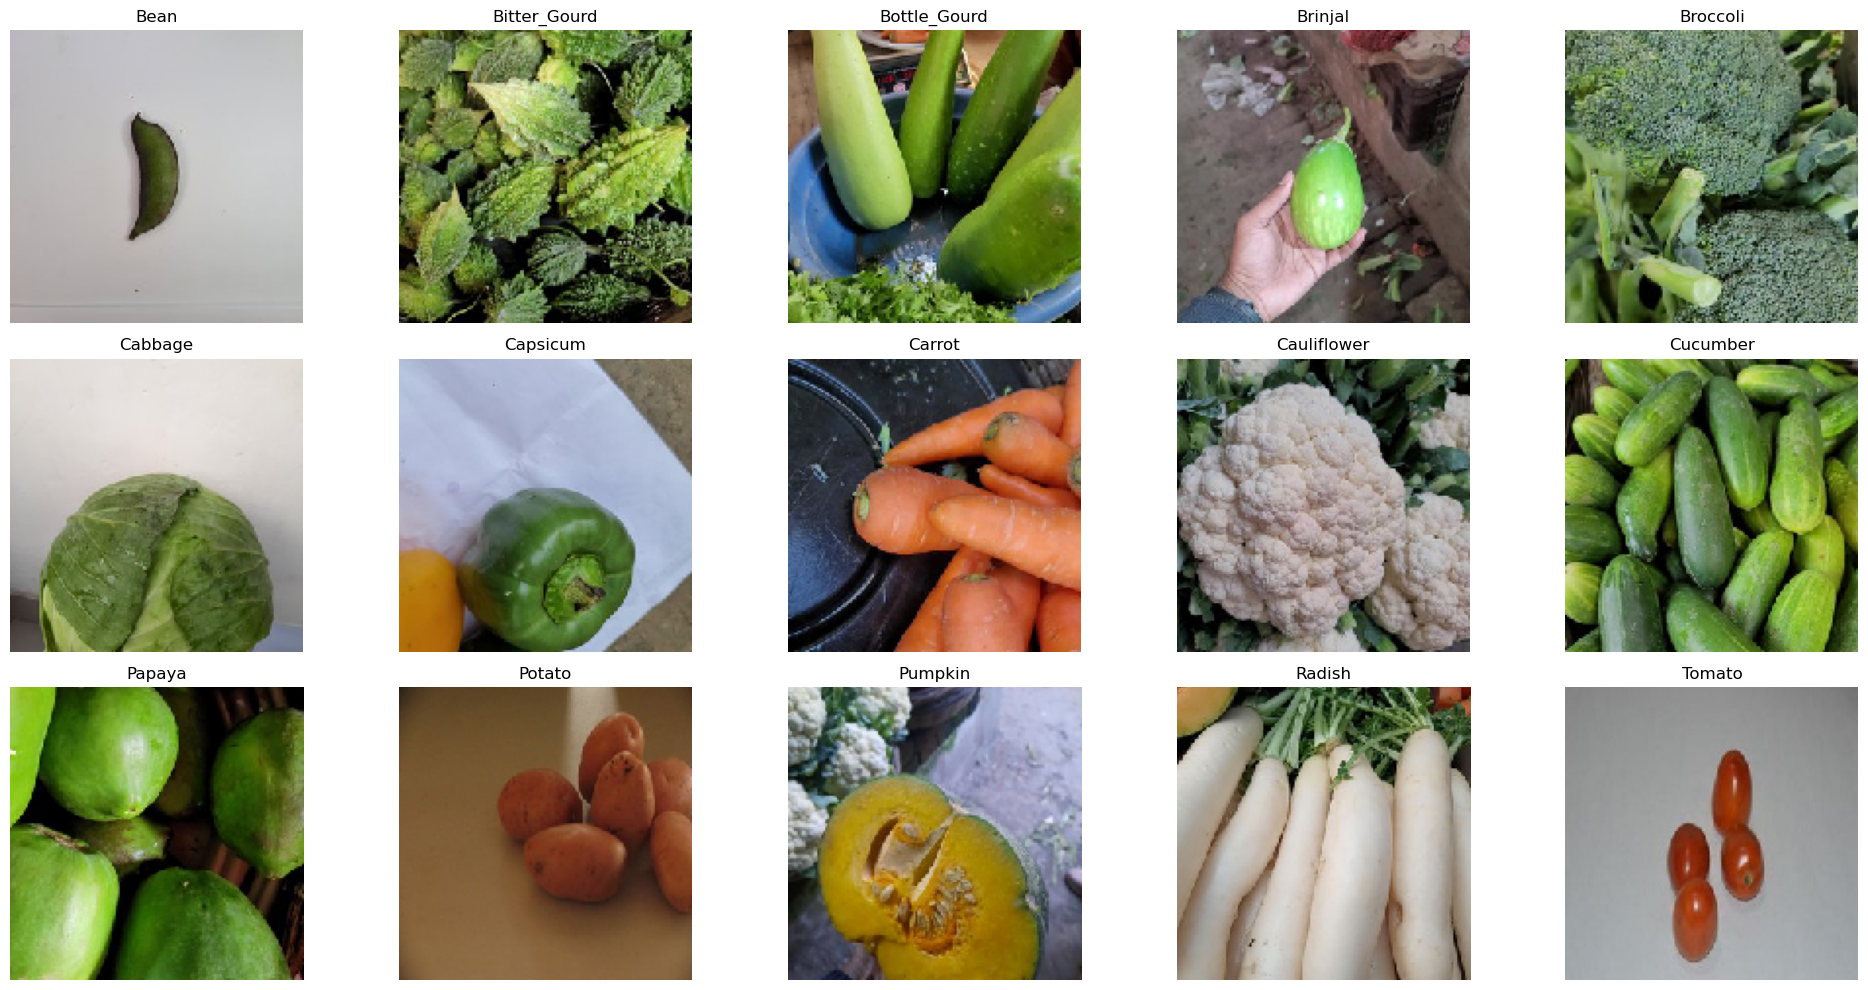

In [ ]:
def plot_images(image_categories, base_dir, num_images=5, image_size=(150, 150)):
    # Create a figure with specific size
    plt.figure(figsize=(20, 10))

    # Iterate over each category
    for i, category in enumerate(image_categories):
        # Define the path to the images of the current category
        category_dir = os.path.join(base_dir, category)

        # List of images in the current category
        images = os.listdir(category_dir)[:num_images]

        # Load and display one image from each category
        for j, img_name in enumerate(images[:1]):  # Load only the first image from each category
            # Load the image
            img_path = os.path.join(category_dir, img_name)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize the image

            # Subplot configuration
            plt.subplot(len(image_categories)//5, 5, i + 1)
            plt.imshow(img_array)
            plt.axis('off')
            plt.title(category)

    plt.tight_layout()
    plt.show()

# Path to the training directory
train_dir = r"D:\Vegetable Images\train"

# Plot images from the training set
plot_images(image_categories, train_dir, num_images=5)

### Build the CNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from tensorflow.keras.layers import MaxPool2D

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Dropout

### Initialize the CNN model

In [ ]:
cnn_model = Sequential()

In [ ]:
target_size = (150, 150, 3)

##### Add the Conv Layer

In [ ]:
#filters -- no of filters
#kernel_size -- filter size
#strides -- steps to move the filter

#kernel_initializer -- init the filter

#relu -- remove the negative pixels and also to activate the specific filters
conv_layer = Conv2D(filters = 32,
                    kernel_size = (3, 3),
                    strides = (1, 1),
                    padding = "same",
                    activation = "relu",
                    input_shape = target_size)

In [ ]:
cnn_model.add(conv_layer)

##### Add the Pooling layer

In [ ]:
max_pool_layer = MaxPool2D(pool_size = (2, 2), strides = (2,2))

In [ ]:
cnn_model.add(max_pool_layer)

#### Add Conv Layer -2

In [ ]:
conv_layer_2 = Conv2D(filters = 64,
                    kernel_size = (3, 3),
                    strides = (1, 1),
                    padding = "same",
                    activation = "relu")

In [ ]:
cnn_model.add(conv_layer_2)

##### Add the Pooling layer -2

In [ ]:
max_pool_layer_2 = MaxPool2D(pool_size = (2, 2), strides = (2,2))

In [ ]:
cnn_model.add(max_pool_layer_2)

#### Add the Flatten layer

In [ ]:
flatten_layer = Flatten()

In [ ]:
cnn_model.add(flatten_layer)

##### Add the Hidden / Fully Connected Layer

In [ ]:
#units -- no of neurons/nodes in particular layer
#units -- hyperparameter -- hit and trail
hidden_layer = Dense(units = 128,
                     activation = "relu")

In [ ]:
cnn_model.add(hidden_layer)

In [ ]:
cnn_model.add(Dropout(0.25))

### Add Hidden layer -2

In [ ]:
hidden_layer_2 = Dense(units = 128,
                     activation = "relu")

In [ ]:
cnn_model.add(hidden_layer_2)

#### Add Output layer

In [ ]:
output_layer = Dense(units = 15,
                    activation = "softmax")

In [ ]:
cnn_model.add(output_layer)

### Compile the model

In [ ]:
from tensorflow.keras.optimizers import Adam

adam_optimizer = Adam(learning_rate = 0.001, beta_1=0.9,
                                            beta_2=0.98,
                                            epsilon=1e-07)

In [ ]:
cnn_model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model

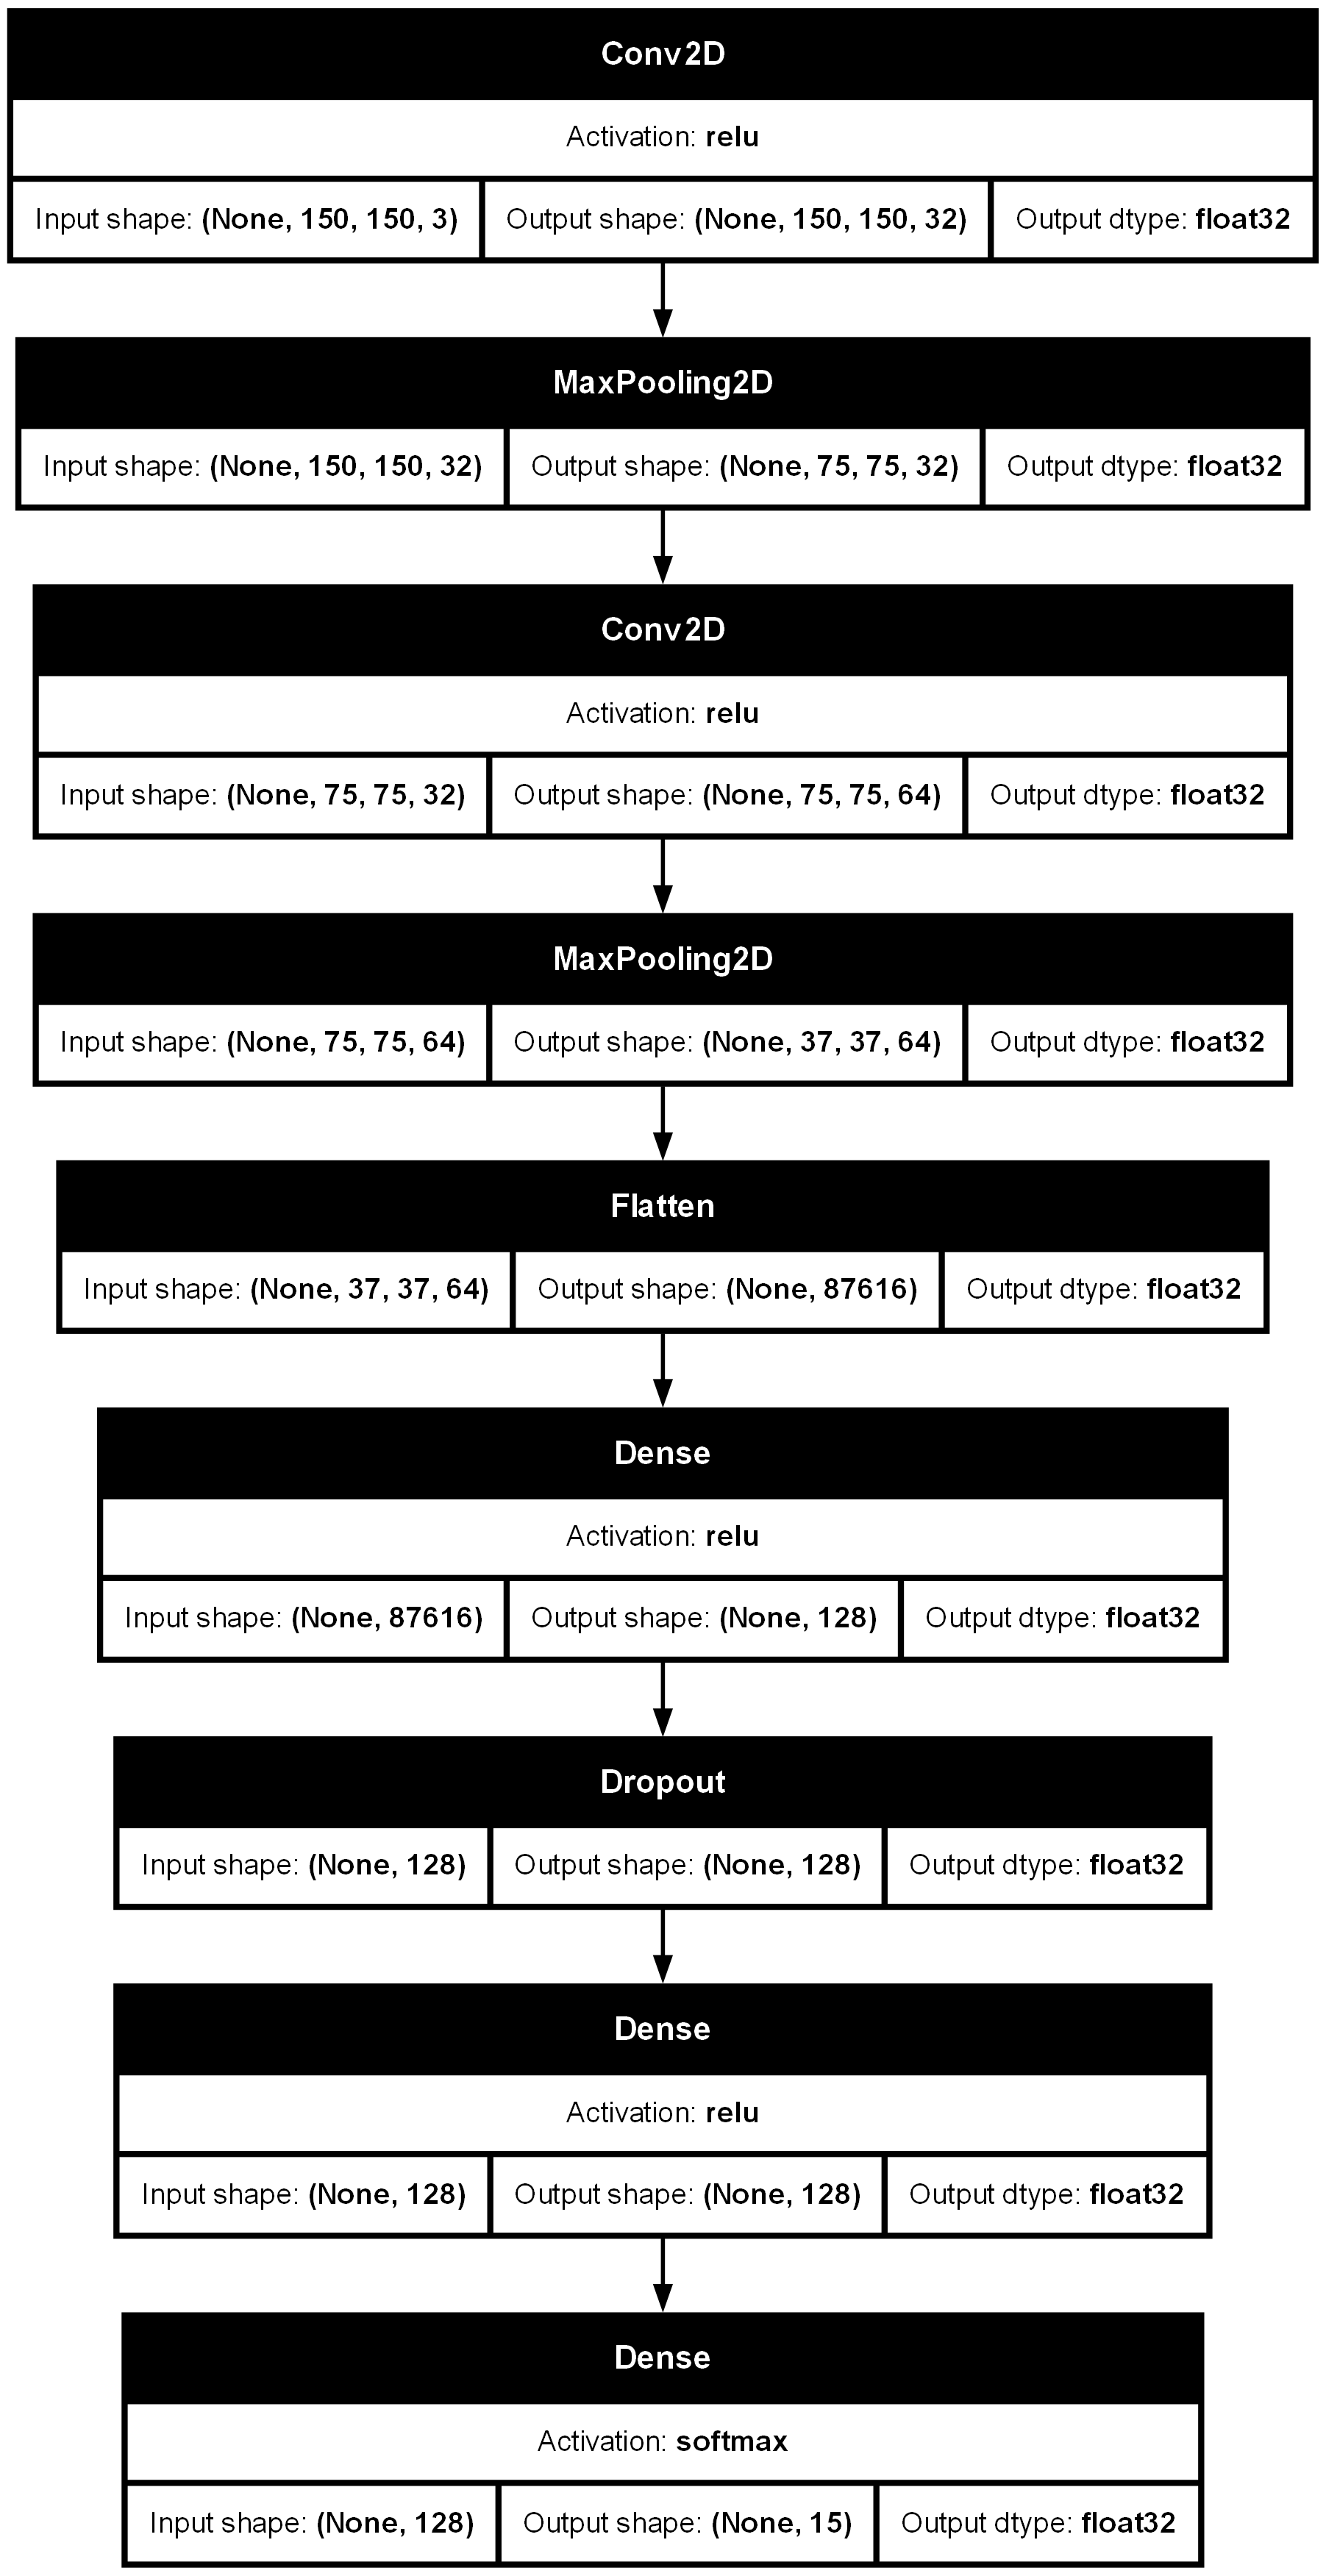

In [ ]:
plot_model(cnn_model, show_shapes = True, show_dtype = True, show_layer_activations = True)

##### Load the data -- Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen = ImageDataGenerator(rotation_range =3,#apply rotation randomly from 0 to 5 Degree
                               shear_range =0.01,
                               horizontal_flip = True,
                               vertical_flip = True,
                               rescale = 1.0/255 )#scaling the pixels

In [ ]:
val_gen = ImageDataGenerator(rescale = 1.0/255) # Normalise the data

In [ ]:
test_data_gen = ImageDataGenerator(rescale = 1.0/255 )

In [ ]:
target_size[:2]

(150, 150)

In [ ]:
#train data path

train_data = train_data_gen.flow_from_directory(train_path,
                                  target_size = target_size[:2],
                                  class_mode = "categorical",
                                  batch_size = 32,
                                  shuffle = True)

Found 15000 images belonging to 15 classes.


In [ ]:
train_data

In [ ]:
val_data = train_data_gen.flow_from_directory(validation_path,
                                  target_size = target_size[:2],
                                  class_mode = "categorical",
                                  batch_size = 32,
                                  shuffle = True)

Found 3000 images belonging to 15 classes.


In [ ]:
val_data

In [ ]:
test_data = train_data_gen.flow_from_directory(test_path,
                                  target_size = target_size[:2],
                                  class_mode = "categorical",
                                  batch_size = 32,
                                  shuffle = False)

Found 3000 images belonging to 15 classes.


In [ ]:
train_data.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:
train_data.classes

array([ 0,  0,  0, ..., 14, 14, 14])

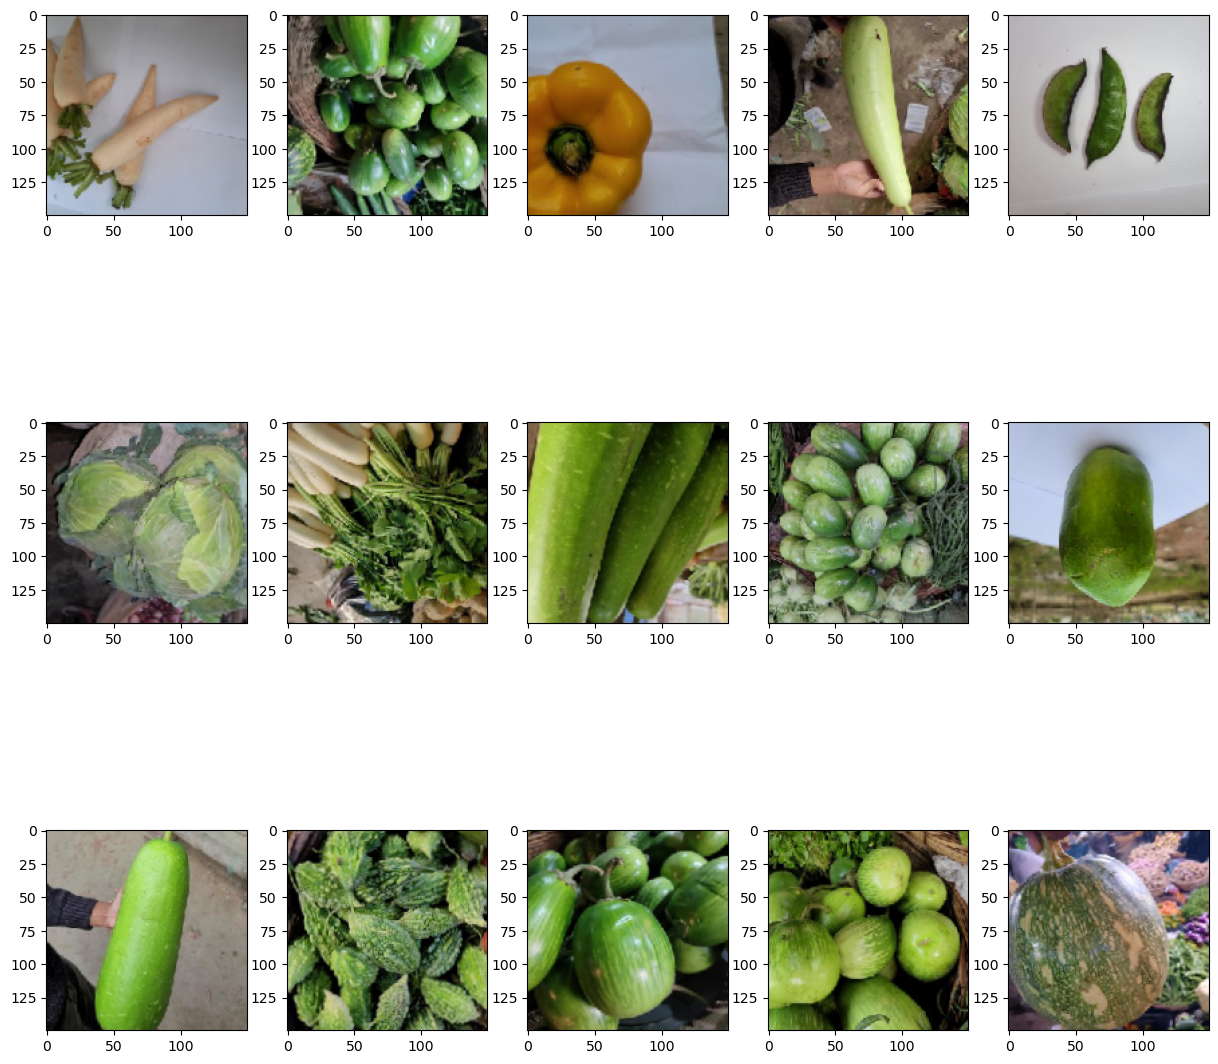

In [ ]:
plt.figure(figsize = (15,15))
for idx, each_batch in enumerate(train_data, 1):
#     print(each_batch[0].shape)
#     print(each_batch[1])
    img = each_batch[0][0]
    plt.subplot(3,5,idx)
    plt.imshow(img)
    if idx >= 15:
        break

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
ckpt = ModelCheckpoint("Vegetable_Image_Classification.keras", monitor = "val_loss", verbose = 10,  save_best_only = True, mode = "min")

In [ ]:
tensor_board = TensorBoard(log_dir="logs",  write_images = True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Assuming cnn_model is defined and train_data, val_data are set up correctly

# Set up EarlyStopping callback
early_stopping = EarlyStopping(patience=5)

# Train the model
hist = cnn_model.fit(
    train_data,
    epochs=50,
    verbose=1,
    validation_data=val_data,
    steps_per_epoch=15000 // 32,
    validation_steps=3000 // 32,
    callbacks=[ckpt, tensor_board]
)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.2672 - loss: 2.2821
Epoch 1: val_loss improved from inf to 1.07777, saving model to Vegetable_Image_Classification.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 398s 828ms/step - accuracy: 0.2675 - loss: 2.2810 - val_accuracy: 0.6364 - val_loss: 1.0778
Epoch 2/50
  1/468 ━━━━━━━━━━━━━━━━━━━━ 3:04 396ms/step - accuracy: 0.5312 - loss: 1.2958
Epoch 2: val_loss improved from 1.07777 to 0.91116, saving model to Vegetable_Image_Classification.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5312 - loss: 1.2958 - val_accuracy: 0.7500 - val_loss: 0.9112
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.5937 - loss: 1.1623
Epoch 3: val_loss improved from 0.91116 to 0.83625, saving model to Vegetable_Image_Classification.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 397s 842ms/step - accuracy: 0.5937 - loss: 1.1622 - val_accuracy: 0.7198 - val_loss: 0.8362
Epoch 4/50
  1/468 ━━━━━━━━━━━━━━━━━━━━ 3:16 422ms/step - accura

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


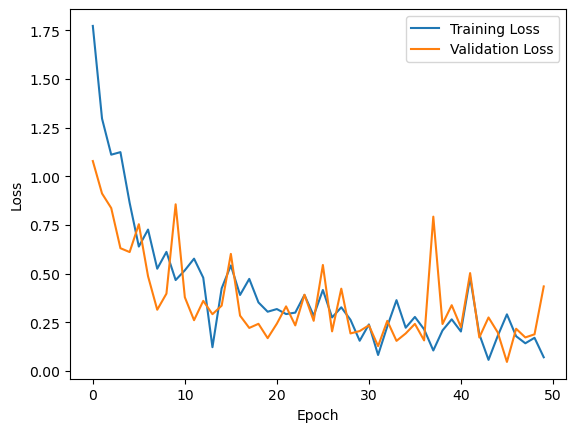

In [ ]:
print(hist.history.keys())

# Example: Print loss and validation loss over epochs


plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
import numpy as np

In [ ]:
# Predict probabilities
y_pred_prob = cnn_model.predict(test_data)
print(y_pred_prob)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step
[[2.9925569e-03 2.5018402e-05 1.9256307e-05 ... 1.4622438e-03
  1.8279208e-05 4.0418552e-03]
 [9.9867791e-01 4.3130803e-04 3.2039591e-06 ... 1.2084346e-08
  7.7130924e-09 1.4297270e-06]
 [9.9968302e-01 2.6801330e-05 1.2769892e-10 ... 8.6006935e-09
  2.2883717e-11 3.5177416e-07]
 ...
 [9.0113908e-16 1.8353228e-13 1.2386868e-19 ... 1.4016943e-09
  9.1519685e-13 9.9999964e-01]
 [9.5111900e-06 2.2391941e-04 1.8987043e-09 ... 5.2268388e-06
  1.7747531e-07 9.9968541e-01]
 [5.1793825e-12 2.2941657e-10 2.5526668e-14 ... 1.6820080e-06
  2.8887550e-08 9.9993563e-01]]
[ 6  0  0 ... 14 14 14]


In [ ]:
# True class labels
y_test = test_data.classes
print(y_test)

[ 0  0  0 ... 14 14 14]


In [ ]:
# Print accuracy score
print("Test Accuracy score:", accuracy_score(y_test, y_pred))

Test Accuracy score: 0.9396666666666667


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

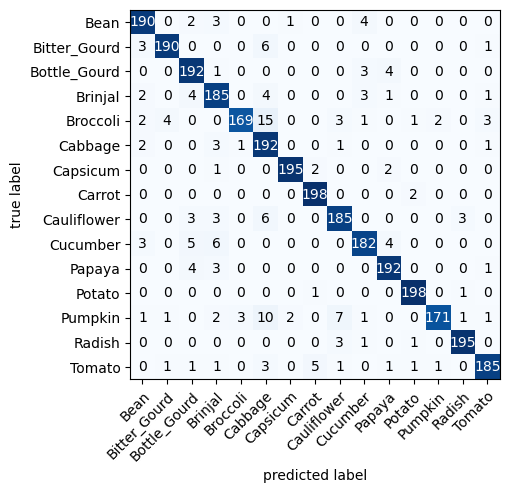

In [ ]:

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plot_confusion_matrix(conf_mat=cm_test, class_names=image_categories)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


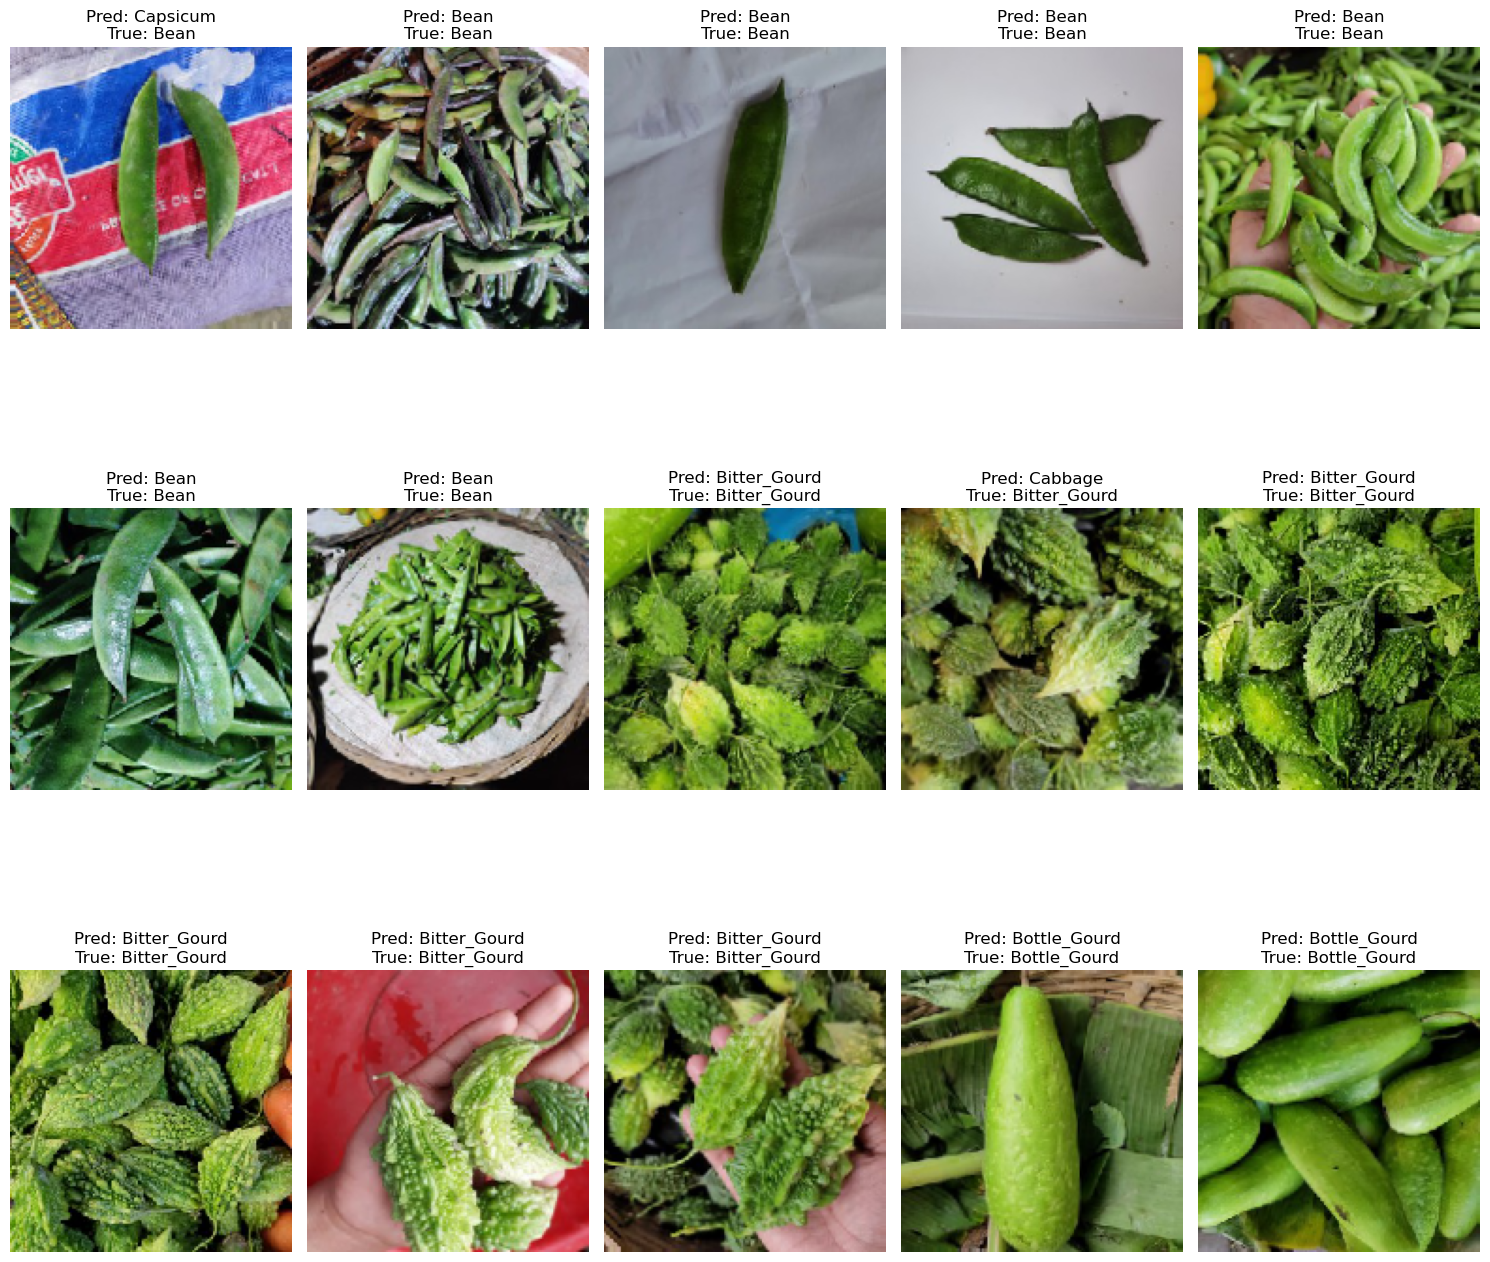

In [ ]:
# Make predictions and plot images
plt.figure(figsize=(15, 15))
for i in range(15):
    # Get one batch of images
    img, label = test_data[i]

    # Make a prediction
    prediction = cnn_model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the true label
    true_class = np.argmax(label, axis=1)[0]

    # Plot the image with predicted and true label
    plt.subplot(3, 5, i + 1)
    plt.imshow(img[0])
    plt.title(f"Pred: {image_categories[predicted_class]}\nTrue: {image_categories[true_class]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
cnn_model.save("cnn_veg_img.h5")